# Desafío - Gráficos y correlación
- Karen Cortés
- Constanza Córdova
- Gustavo Lizama

## 1. Importar librerías y .csv

Importe las librerías básicas para el análisis de datos <br>
Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

el problema esta en la codificacion del archivo, por lo que para solucionarlo se debe agregar algun tipo de codificacion usando enconding 

In [2]:
df = pd.read_csv('nations.csv', encoding='gbk')

In [3]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## 2. Refactor gráficos matplotlib a seaborn

### a.1) Refacotrizar funcion original:

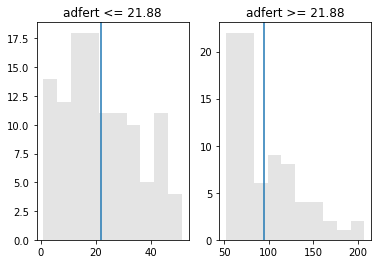

In [14]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')

##### refactorización función anterior con seaborn Opción 1:

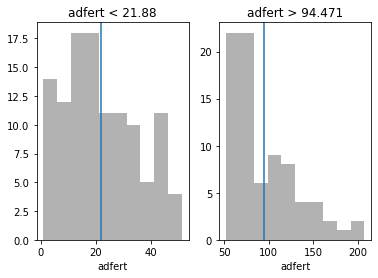

In [7]:
def binarize_histogram1(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    sns.distplot(hist_0, bins=10, kde=False, hist_kws={"alpha": 0.6, "color": "grey"}).set_title("{0} < {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.axvline(np.mean(hist_0))
        
    plt.subplot(1, 2, 2)
    sns.distplot(hist_1, bins=10, kde=False, hist_kws={"alpha": 0.6, "color": "grey"}).set_title("{0} > {1}".format(variable, round(np.mean(hist_1), 3)))
    plt.axvline(np.mean(hist_1))

binarize_histogram1(df, 'adfert')

##### refactorización función anterior con seaborn Opción 2:
- Aparte de la refactorización, se corrigen los títulos de los histogramas, ya que el histograma de la izquierda corresponde a las observaciones de la variable 'adfert' que se encuentran bajo o igual a la media muestral, en cambio el histograma de la derecha corresponde a las observaciones que se encuentra sobre la media muestral 

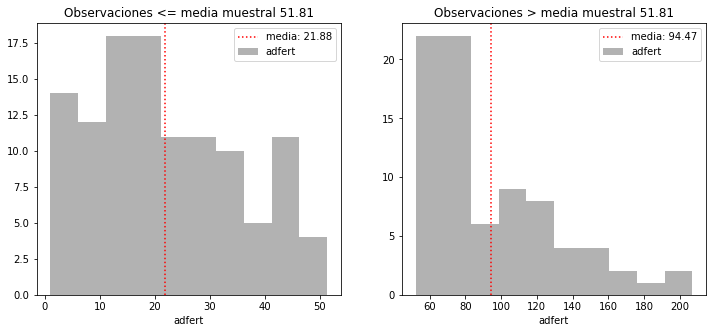

In [13]:
def binarize_histogram1(dataframe, variable):
    tmp = dataframe
    media = np.mean(tmp[variable])
    tmp['binarize'] = np.where(tmp[variable] > media, 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    sns.distplot(hist_0, bins=10, kde=False, hist_kws={"alpha": 0.6, "color": "grey"}, label = variable).set_title(f"Observaciones <= media muestral {round(media,2)}")
    plt.axvline(np.mean(hist_0), color='r', ls="dotted", label = f'media: {round(np.mean(hist_0),2)}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.distplot(hist_1, bins=10, kde=False, hist_kws={"alpha": 0.6, "color": "grey"}, label = variable).set_title(f"Observaciones > media muestral {round(media,2)}")
    plt.axvline(np.mean(hist_1), color='r', ls="dotted", label = f'media: {round(np.mean(hist_1),2)}')
    plt.legend()

plt.figure(figsize = (12,5))
binarize_histogram1(df, 'adfert')

### a.2) Refacotrizar funcion original:

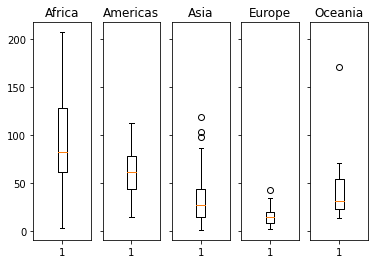

In [15]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
        
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

##### refactorización función anterior con seaborn Opción 1:

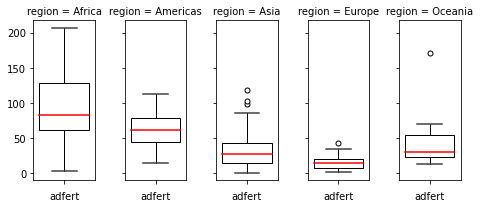

In [16]:
def grouped_boxplot1(dataframe, variable, group_by):
   
    grid = sns.FacetGrid(dataframe, col = group_by, despine=False, aspect=.45)
    grid = grid.map(sns.boxplot, variable, orient='v', order=1, boxprops={'color':'white', 'linewidth':'1','edgecolor':'black'}, 
    whiskerprops={'color':'black', 'linewidth':'1'}, medianprops={'color':'red'}, flierprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})
        
grouped_boxplot1(df, 'adfert', 'region')

##### refactorización función anterior con seaborn Opción 2:

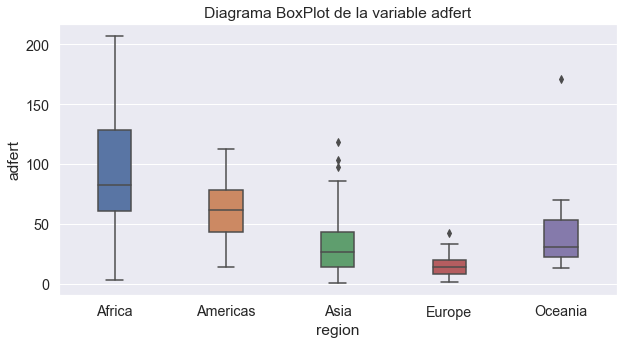

In [19]:
def grouped_boxplot2(dataframe, variable, group_by):
    sns.set(font_scale=1.3)
    sns.boxplot(x= dataframe[group_by], y= dataframe[variable], width = 0.3)
    plt.title(f"Diagrama BoxPlot de la variable {variable}")
    
plt.figure(figsize = (10,5))
grouped_boxplot2(df, 'adfert', 'region')

### b) Refacotrizar función original:

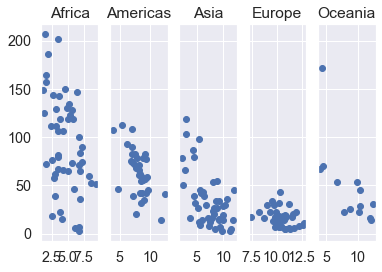

In [27]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
    
grouped_scatterplot(df, 'school', 'adfert', 'region')

##### refactorización función anterior con seaborn Opción 1:

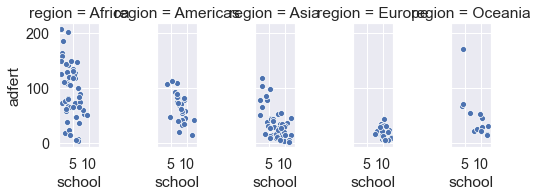

In [28]:
def grouped_scatterplot1(dataframe, x, y, group_by):
    
    grid = sns.FacetGrid(dataframe, col = group_by, aspect=.5, despine=False)
    grid = grid.map(sns.scatterplot, x, y)
    
grouped_scatterplot1(df, 'school', 'adfert', 'region')


##### refactorización función anterior con seaborn Opción 2:

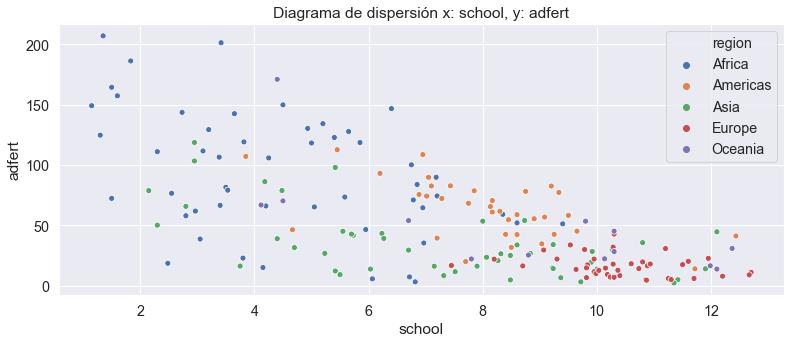

In [31]:
def grouped_scatterplot2(dataframe, x, y, group_by):
    sns.set(font_scale=1.3)
    sns.scatterplot(data = dataframe, x = x, y = y, hue = group_by)
    plt.title(f"Diagrama de dispersión x: {x}, y: {y}")
    
plt.figure(figsize = (13,5))
grouped_scatterplot2(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables
En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6 <br>
Apellidos desde la A hasta la N: Enfocarse en las variables chldmort (Probabilidad de muerte antes de los 5 años por cada 1000) , adfert (Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19)) y life (Esperanza de vida al nacer).

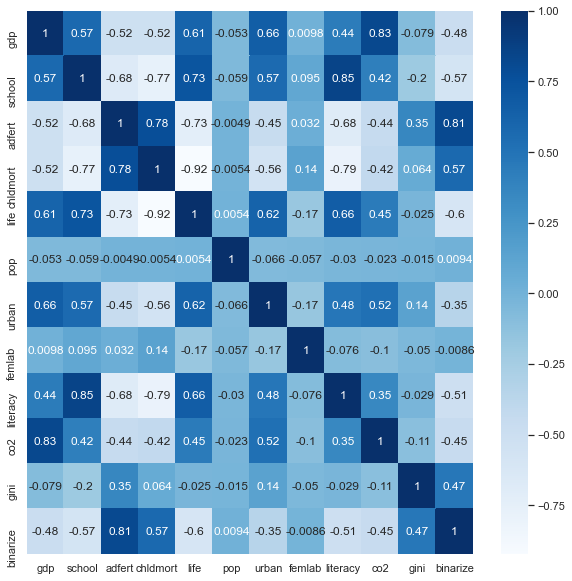

In [33]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Se puede apreciar que las principales correlaciones de las variables de interés asignadas, chldmort (Probabilidad de muerte antes de los 5 años por cada 1000) , adfert (Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19)) y life (Esperanza de vida al nacer), son:
- adfert y chldmort
- life con las variables: literacy(Tasa de alfabetismo), school(Promedio años de escolaridad), urban(Porcentaje de población urbana), gdp(Producto Interno Bruto per cápita)

<br>al tener valores positivos altos se puede decir que hay una mayor relacion entre ellas.   


## 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

In [34]:
df_nuevo = df.loc[:, ['region', 'gdp', 'school', 'life', 'urban', 'literacy', 'chldmort', 'adfert']]

In [35]:
df_nuevo.head()

,region,gdp,school,life,urban,literacy,chldmort,adfert
0,Africa,7300.399902,6.716667,72.316666,64.933334,72.599998,34.75,7.300000
1,Africa,1338.800049,3.100000,54.733334,41.000000,41.700001,122.75,111.699997
2,Africa,12307.400391,8.600000,52.250000,59.250000,84.099998,60.25,52.099998
3,Africa,1063.400024,1.300000,53.783333,23.583334,23.600000,170.50,124.800003
4,Africa,349.200012,2.483333,48.866665,10.250000,66.599998,168.50,18.600000


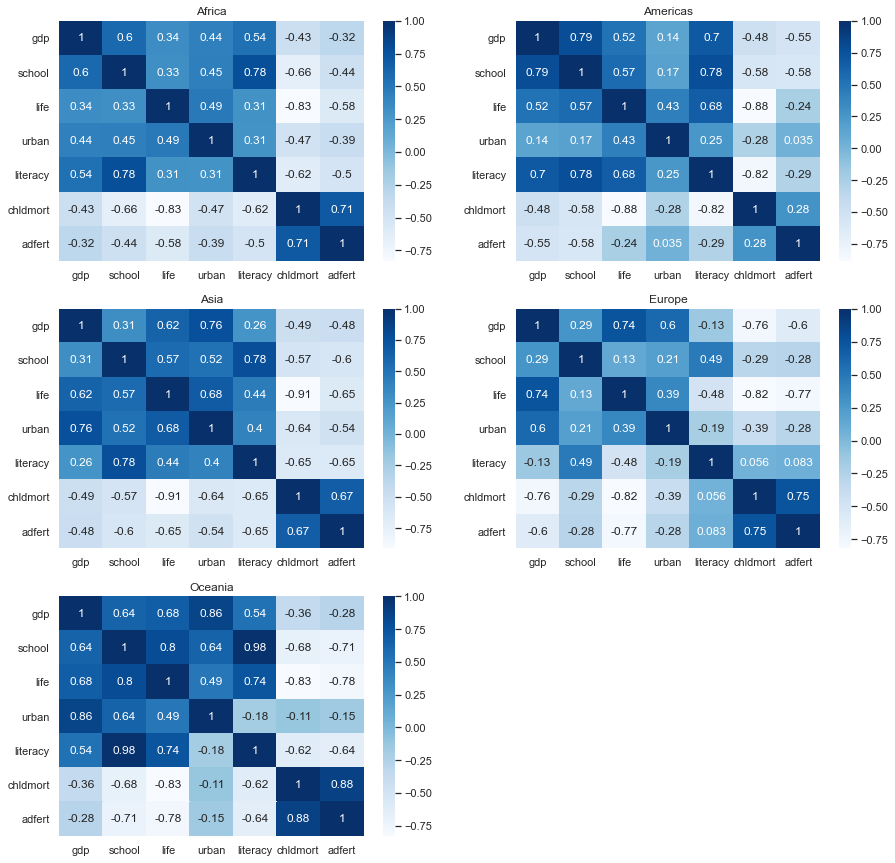

In [36]:
plt.figure(figsize=(15, 15))

tmp = df_nuevo['region'].unique()

for i,n in enumerate(tmp):
    plt.subplot(3, 2, i+1)
    sns.heatmap(df_nuevo[df_nuevo['region'] == n].corr(), cmap='Blues', annot=True)
    plt.title(n)

la correlacion entre literacy y school es alta en Oceania(0.98), Africa (0.78), Americas(0.78), Asia(0.78), pero no asi en Europe(0.49)<br>
la correlacion entre chldmort y adfert es alta en Oceania(0.88), Europe(0.75), Africa(0.71), Asia(0.67) pero no asi en America (0.28)<br>
la correlacion entre chldmort y life es negativa en los 5 continentes: Oceania(-0.83), Europe(-0.82), Africa(-0.83), Americas(-0.88), Asia(-0.91)

## Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.

In [37]:
def dibujar_dispersion(var1, var2):
    tmp1 = df_nuevo['region'].unique()
    
    plt.figure(figsize=(15, 15))

    for i,n in enumerate(tmp1):
        plt.subplot(3, 2, i+1)
        sns.scatterplot(x=df_nuevo[df_nuevo['region'] == n][var1], y=df_nuevo[df_nuevo['region'] == n][var2], color='blue')
        plt.title(n)


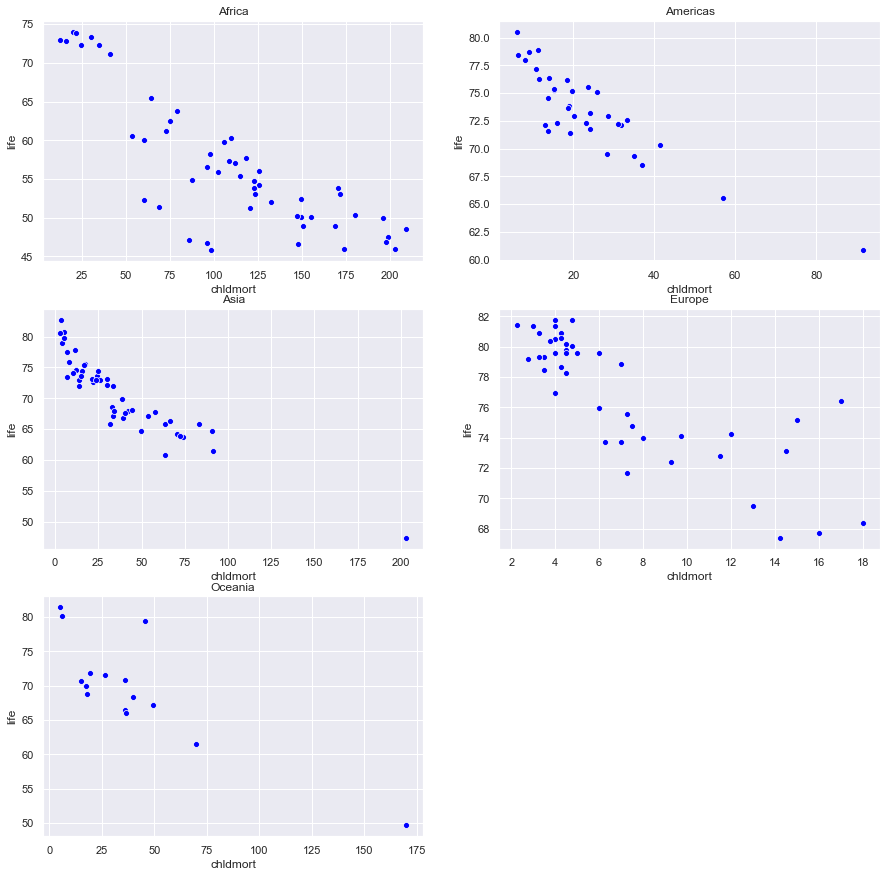

In [38]:
dibujar_dispersion('chldmort', 'life')

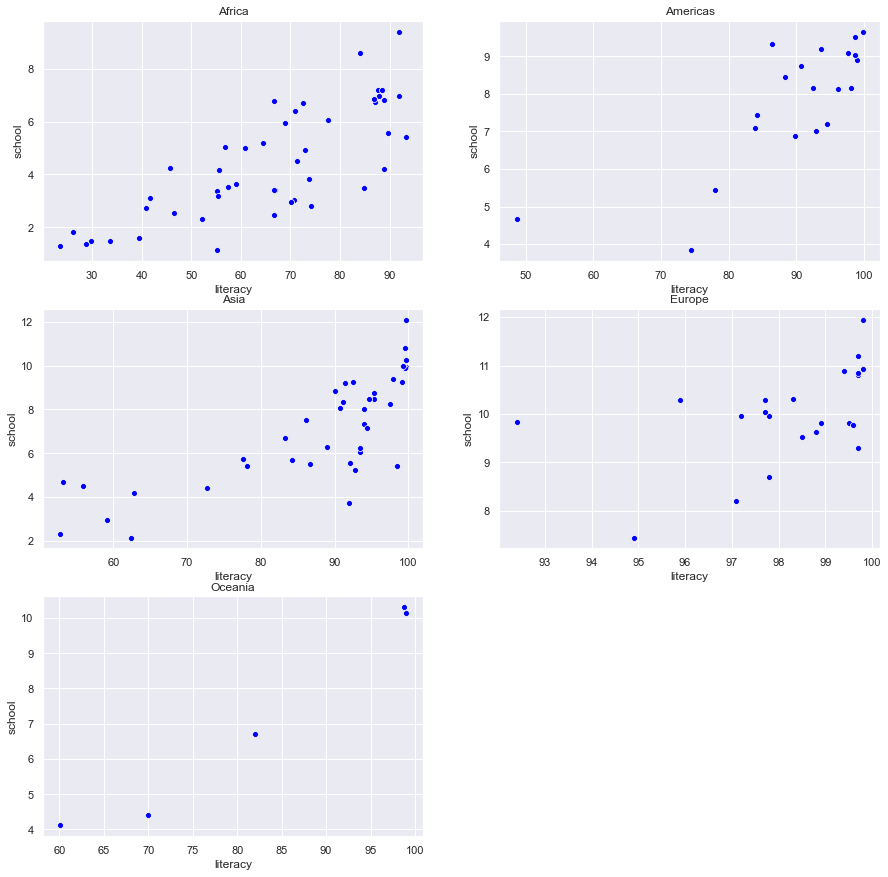

In [39]:
dibujar_dispersion('literacy', 'school')

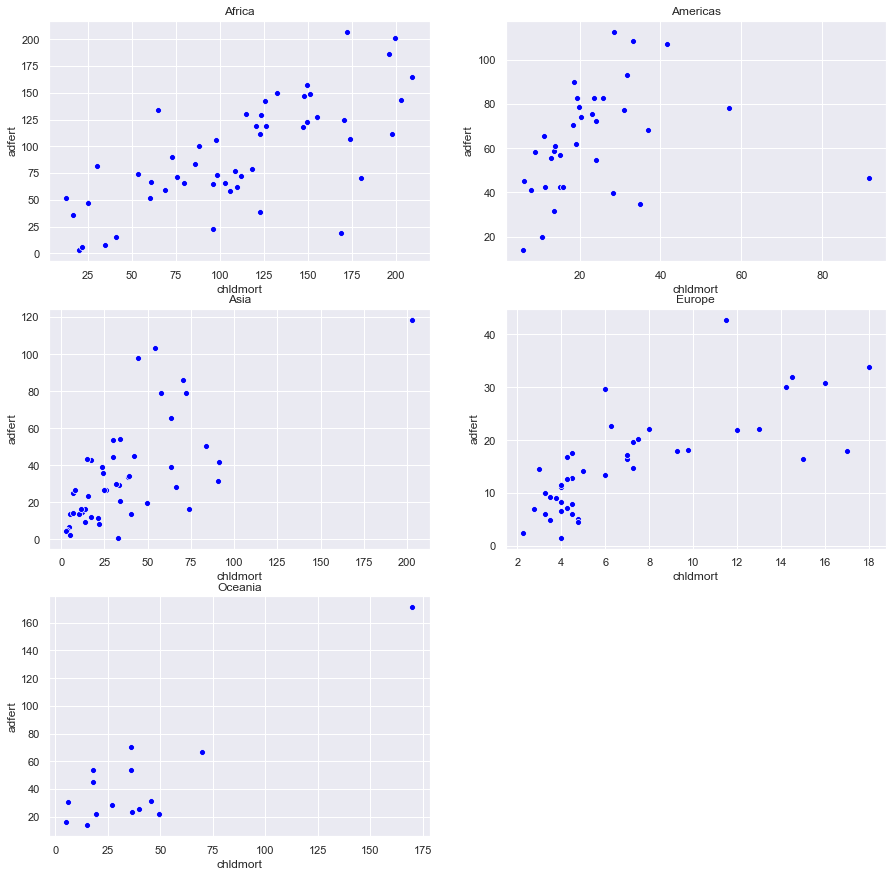

In [40]:
dibujar_dispersion('chldmort', 'adfert')